# K-means algorithm
## Dataset

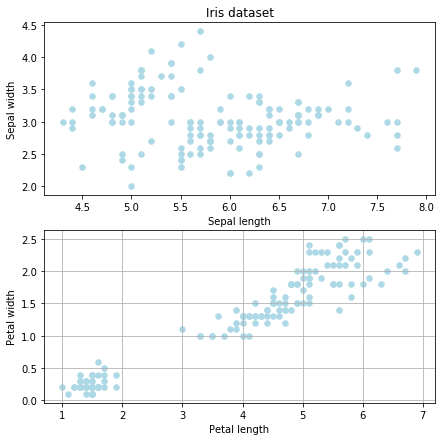

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from utils import *

X, y = load_iris(return_X_y=True)
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.scatter(X[:,0],
           X[:,1],
            c='lightblue',
           marker='o',
           s=30)
plt.title('Iris dataset')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.subplot(212)
plt.scatter(X[:,2],
           X[:,3],
            c='lightblue',
           marker='o',
           s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.grid()
plt.show()

## Finding out the k number
### Elbow method

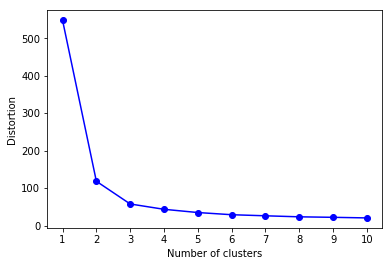

In [86]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o', c='blue')
plt.xticks(list(range(1,11)))
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
# As we can see, the best number of k is 3 for the dataset

### Silhouette plot 

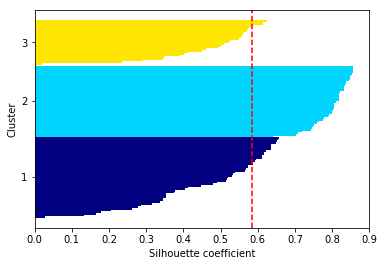

In [87]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

km = KMeans(n_clusters=3,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), 
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color='red',
           linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## Manual implementation

In [88]:
class Kmeans:
    def __init__(self, k, n_iter=20, tol=-1, max_iter=200, how='euclid', seed=0):
        np.random.seed(seed)
        self.k = k
        self.n_iter = n_iter
        self.tol = tol
        self.max_iter = max_iter
        self.how = how
        self.clusters = []
    
    def fit(self, X):
        n_dim = X.shape[1]
        self.centroids = np.random.rand(self.k, n_dim)
        iter_count = 0
        
        for i in range(n_dim):
            # Initialize centroids in random points 
            # but between min and max values of axis 
            n_max, n_min = max(X[:,i]), min(X[:,i]) 
            self.centroids[:,i] = n_min+(n_max-n_min)*self.centroids[:,i] 

        while True:
            clusters = self.predict(X)
            # If the tolerance not specified
            # then number of iterations used
            if self.tol < 0:
                for n in range(self.k):
                    self.centroids[n,:] = np.mean(X[clusters==n], axis=0)
                iter_count += 1
                if iter_count == self.n_iter:
                    self.clusters = clusters
                    return self
            # If the tolerance specified
            # then the sum of distances between old and new center is used
            # along with the maximum amount of iterations
            else:
                sum_tol = 0
                for n in range(self.k):
                    prev_centr = self.centroids[n,:]
                    new_centr = np.mean(X[clusters==n], axis=0)
                    self.centroids[n,:] = new_centr
                    sum_tol += self._calc_dist(prev_centr, new_centr, self.how)
                iter_count += 1
                if sum_tol <= self.tol or iter_count == self.max_iter:
                    self.clusters = clusters
                    return self
                
    def predict(self, X):
        clusters = []
        for point in X:
            distances = []
            # Calculate distances to all centroids
            for center in self.centroids:
                dist = self._calc_dist(point, center, self.how)
                distances.append(dist)
            # Set cluster no. by the number of the closest centroid 
            clusters.append(distances.index(min(distances)))
        return np.array(clusters)

    def _calc_dist(self, point1, point2, how):
        if how == 'euclid':
            return euclidean_dist_sq(point1, point2)
        elif how == 'minkowski':
            return minkovski_dist(point1, point2, p=2.0)
        elif how == 'taxicab':
            return taxicab_dist(point1, point2)
        elif how == 'chebyshev':
            return chebyshev_dist(point1, point2)

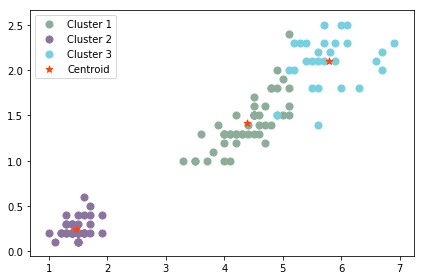

In [89]:
from utils import cluster_plot


km = Kmeans(k=3)
km = km.fit(X)
y_km = km.clusters

x_c = 2 # Petal length
y_c = 3 # Petal width 
cluster_plot(X_dat=X, y_dat=y_km, 
             x_coord=x_c, y_coord=y_c, 
             cen_x=km.centroids[:,x_c], cen_y=km.centroids[:,y_c])

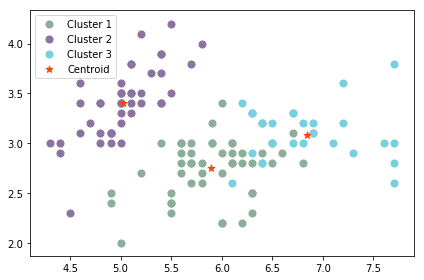

In [90]:
x_c = 0 # Sepal length
y_c = 1 # Sepal width 
cluster_plot(X_dat=X, y_dat=y_km, 
             x_coord=x_c, y_coord=y_c, 
             cen_x=km.centroids[:,x_c], cen_y=km.centroids[:,y_c])

## Sklearn version

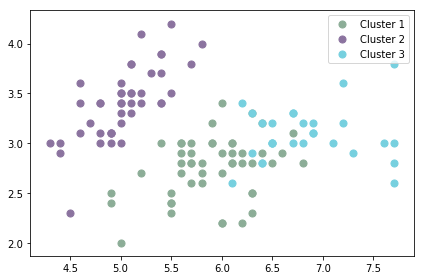

In [91]:
km_sk = KMeans(n_clusters=3,
               init='k-means++',
               n_init=10,
               random_state=0)
y_km_sk = km_sk.fit_predict(X)
x_c = 0 # Sepal length
y_c = 1 # Sepal width 
cluster_plot(X_dat=X, y_dat=y_km_sk, 
             x_coord=x_c, y_coord=y_c)

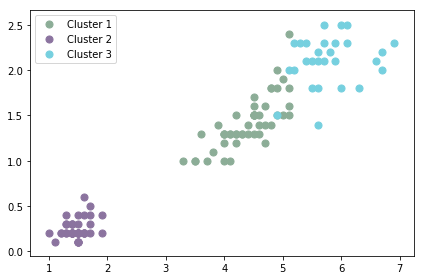

In [105]:
x_c = 2 # Petal length
y_c = 3 # Petal width 
cluster_plot(X_dat=X, y_dat=y_km_sk, 
             x_coord=x_c, y_coord=y_c)